# Recommendation #2 - Music Like Gary Numan

Let's make another recommendation similar to the last workflow. This time though, we will:
- Use music instead of books
- Choose a relatively popular starting point
- Encapsulate shared work in reusable components

In [118]:
%load_ext autoreload
%autoreload 

import pandas as pd
import sqlite3 as sql

import shared.format as fmt
import shared.query as q
import shared.viz as viz
import shared.reviews as rev

viz.set_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
conn = sql.connect('data/products.sql')

In [120]:
albums = q.query("""
SELECT p.id, p.title AS album, p.creator AS artist, COUNT(*) AS reviews
FROM review r JOIN product p on r.product_id = p.id
WHERE p.category = 'Music' AND p.creator_search LIKE '%garynuman%'
GROUP BY r.product_id
ORDER BY reviews DESC
""", conn, query_description = "Gary Numan albums by reviews")
albums[:30]

Gary Numan albums by reviews: 120 results in 7.171 seconds


,id,album,artist,reviews
0,B000006NTW,The Pleasure Principle,Gary Numan,80
1,B00EUEWPVO,Splinter Songs From A Broken Mind,Gary Numan,62
2,B073XSLZXM,Savage Songs from a Broken World,Gary Numan,54
3,B000E6GC3E,Jagged,Gary Numan,52
4,B00000I2B0,Replicas,Gary Numan,52
5,B000006NTP,Telekon,Gary Numan,33
6,B08QRXV5JR,Intruder Deluxe,Gary Numan,32
7,B000050I3X,Pure,Gary Numan,26
8,B073R7QD3N,Savage Songs From A Broken World,Gary Numan,21
9,B073XVJ7LN,Savage Songs from a Broken World Deluxe,Gary Numan,20


With music data, we have quite a disambiguation problem because albums can come in a variety of formats. Also, it is not uncommon for two artists to publish albums with the same name:

In [121]:
album = 'The Pleasure Principle'
albums = q.find_products('Music', album, conn, exact_match = False)
albums

find_products: 14 results in 1.336 seconds


,id,reviews,title,creator,publisher,description,release_date,category,subcategory
0,B000006NTW,80,The Pleasure Principle,Gary Numan,,"Digitally remastered! Debut 1979 solo album, r...","April 30, 2006",Music,
2,B00D6ZCTX2,8,Pleasure Principle,Parlet,,"Of George Clinton's two girl groups, The Bride...","June 5, 2013",Music,
3,B002GKC34I,7,The Pleasure Principle (Expanded Edition),Gary Numan,,"Gary's Replicas had already hit UK #1, but thi...","July 31, 2009",Music,
4,B000W48PHY,4,Gary Numan - The Pleasure Principle,Gary Numan,,,"September 18, 2007",Music,
5,B00005MHPK,4,The Pleasure Principle,Treat,,Wellness version.,"February 11, 2007",Music,
7,B004EFN6D0,2,Pleasure Principle Live,Gary Numan,,Gary Numan's The Pleasure Principle was recent...,"December 1, 2010",Music,
9,B07WNVLWHL,1,The Pleasure Principle - The First Recordings ...,Gary Numan,,Released as a 40th anniversary edition of the ...,"August 27, 2019",Music,
10,B002DM3Y10,1,The Pleasure Principle,Janet Jackson,,,"February 11, 2011",Music,
12,B000EG6DOW,1,The Pleasure Principle / Alright,Janet Jackson,,1. The Pleasure Principle (Legendary Club Mix)...,"February 1, 2006",Music,
13,B000007UBK,1,Pleasure Principle / Warriors,,,,"October 19, 2006",Music,


In [122]:
print(f"Find albums like {album}")
recommendations = q.get_recommendations('Music', album, exact_match = True, conn = conn)

Find albums like The Pleasure Principle
find_products: 8 results in 0.004 seconds
0.005: Found 4 products
SELECT * FROM review WHERE product_id IN (?)
['B000006NTW']
0.0309: Got 80 reviews
0.0656: Got 3531 related reviews of 3274 products by 80 users
0.0681: Filtered 1257 related reviews by user and/or product
0.0708: Created ratings table for 1000 products by 80 users
0.0751: Calculated similarities
0.0913: Removed 10 duplicate editions of the same product
0.0915: Added product details


The database abstraction layer indirectly resolves the issue by sorting by number of reviews. In most cases we are interested in the #1 result

In [123]:
product = recommendations['result']
product

id                                                     B000006NTW
reviews                                                        80
title                                      The Pleasure Principle
creator                                                Gary Numan
publisher                                                        
description     Digitally remastered! Debut 1979 solo album, r...
release_date                                       April 30, 2006
category                                                    Music
subcategory                                                      
Name: 0, dtype: object

## Reviews

In [124]:
reviews = recommendations['reviews']
reviews = rev.sort_reviews(reviews, include_quality = False)
reviews

,user_id,product_id,title,review,rating,upvotes,downvotes,timestamp
16,AGAKV2IAD5E3UE336W2LNQDLAV4Q,B000006NTW,&quot;We're in the building where they make us...,"The Pleasure Principle, of course, is Gary Num...",5,28,0,1091750010000
56,AFI6E7QHKZFV5QHZW5W3TDXWWNXQ,B000006NTW,Classic,"A little Numan goes a long way, but that's not...",5,21,0,1391939375000
46,AGHEJLFPUZL6D7ERLFNCK6YEYALQ,B000006NTW,Plastic Passion,&quot;New Wave&quot; was a woefully insufficie...,5,15,0,1089337846000
73,AG65JL7X4WEBSSLLOVJYXB3E2DLQ,B000006NTW,synth pop second only to kraftwerk..and that's...,What could one say about The Pleasure Principl...,5,10,0,1105152317000
58,AHHYIUN2KYBLRS3W42JMAJIADVOQ,B000006NTW,"This album rocks, even without guitars!","-------<br />Yes, this is the one with ""Cars""....",5,9,0,1061311034000
...,...,...,...,...,...,...,...,...
22,AHWLBR5PUSPDCFUBDQ4YZKYBXNMA,B000006NTW,Gary Numan is the pioneer of 80's synth punk,This is a must have for any 80's synth techno ...,5,0,0,1634003558599
52,AHHYEF67Y2F4PVUCBE5XABU6EFLQ,B000006NTW,Great audio!,Impressive audio from this disk - far superior...,5,0,0,1649721391081
21,AF6GFNBXEMUE6WEJZOGS4FH6WO4A,B000006NTW,Nice CD,"Nice CD, i looked for it around town and no on...",5,0,0,1421897467000
55,AGXT66Z6YMNLGCFKYSAPXJ4JZAZA,B000006NTW,it is my favorite GN album,"I've had it several times but scratched it, it...",5,0,0,1464111892000


In [125]:
print("Great review:")
print(reviews.iloc[0].review.replace('.', '\n'))

Great review:
The Pleasure Principle, of course, is Gary Numan's most recognizable album because it features &quot;Cars
&quot; Sadly, &quot;Cars&quot; is the only Numan track a lot of people know which is unfortunate because it is not even close to his best work
 It is in the middle of the pack on this album alone
<br /><br /> Every track off Pleasure Principle is classic! The opener &quot;Airlane&quot; is an instrumental but it is by no means a filler
 It rocks and once those drums kick in, it takes the listener for a ride (Numan, not long after this album was released, earned his private pilot's license and traveled around the world)
 &quot;Complex&quot; and &quot;Tracks&quot; are beautiful
 &quot;Metal,&quot; having a very rough sound, is a fan favorite as is &quot;Films&quot; with the powerful, kick-butt drums
 &quot;M
E
&quot; is one of my all-time Numan favorites and &quot;Engineers&quot; is interesting for its, well, ingenuity and for its experimental, retro late 70s/early 80s s

## Ratings

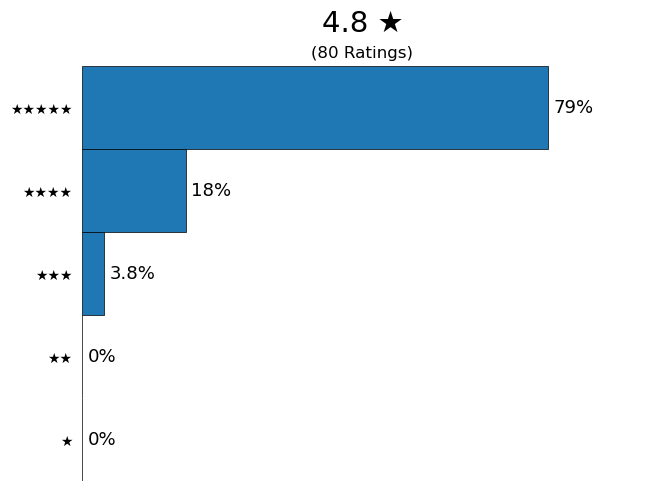

In [126]:
viz.plot_ratings(reviews.rating)

## Recommendations

In [127]:
music_recommendations = recommendations['recommendations']
music_recommendations[:10]

,similarity,title,creator,publisher,description,category,subcategory,release_date
B000006NTP,0.361135,Telekon,Gary Numan,,Gary Numan - Telekon - CD,Music,,"December 7, 2006"
B00000I2B0,0.313260,Replicas,Gary Numan,,"Product Description, Original UK Album plus Si...",Music,,"April 30, 2006"
B000006NTM,0.249872,Tubeway Army,Tubeway Army,,,Music,,None
B00006J677,0.229801,"I, Assassin",Gary Numan,,"Product description, N/A, Review, Even the mos...",Music,,"February 13, 2007"
B0000004U8,0.216313,The Best Of A Flock Of Seagulls,Flock Of Seagulls,,"Product description, No Description AvailableN...",Music,,"December 7, 2006"
B0000085CU,0.210616,Living Ornaments 79,Gary Numan,,England.,Music,,"February 19, 2007"
B000002GZ4,0.210219,Electric Cafe,Kraftwerk,,"Product description, 1986 pioneering electroni...",Music,,"December 15, 2006"
B00NMPSQP6,0.202666,Songs From The Big Chair,Tears For Fears,,"""Everybody Wants to Rule the World,"" ""Head ove...",Music,,"September 22, 2014"
B00000GAIW,0.202666,Aqualung,Jethro Tull,,"Product description, Aqualung (Special Edition...",Music,,"July 26, 2006"
B000002UZ4,0.198915,Pet Shop Boys Discography: The Complete Single...,Pet Shop Boys,,"Product description, No Description Available....",Music,,"April 30, 2006"


## Evaluation

Overall, these results seem quite good. The main issue was in a slow initial search due to ambiguity in the album title.

Again, we see a predominance of works by the same artist even though the recommendation algorithm is artist-agnostic.

Tubeway Army is a Gary Numan project, so has a quite direct connection with Gary Numan.

Kraftwerk fits in well because Kraftwerk and Numan are both pioneers in early synth music and both use similar visual themes.

Flock of Seagulls is apparently influenced by Numan in terms of sound.

Jethro Tull's Aqualung was a surprise, being of a different genre and a predecessor. Apparently the link is that Tull was an early explorer in the use of synths and that The Pleasure Principle and Aqualung explore similar themes such as alienation.

## Close

In [128]:
conn.close()